# ДЗ 2

pandas, eda, графики

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# грузим данные
df = pd.read_csv('S02-hw-dataset.csv')
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [5]:
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


## пропуски и дубликаты

In [6]:
# смотрим где пропуски
df.isna().sum()

user_id      0
age          2
country      0
purchases    0
revenue      0
dtype: int64

In [7]:
# дубликаты
df.duplicated().sum()

np.int64(1)

In [8]:
# какие-то странные значения
# отрицательные покупки
df[df['purchases'] < 0]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [9]:
# возраст больше 100 или меньше 18 это странно
df[(df['age'] > 100) | (df['age'] < 18)]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
20,21,5.0,RU,8,1488


в данных есть косяки - пропуски в age, один дубликат, отрицательные purchases и странный возраст типа 120 лет или 5 лет

## eda

In [10]:
# сколько юзеров по странам
df['country'].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [11]:
# группируем по странам
df.groupby('country').agg({
    'purchases': 'sum',
    'revenue': ['sum', 'mean']
})

purchases revenue             
              sum     sum         mean
country                               
CN              9    2108  1054.000000
DE             39    8673  1445.500000
FR             51    8111   675.916667
RU             62   10271   790.076923
US             37    4459   557.375000

In [12]:
# возрастные группы
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 35, 50, 150], labels=['молодые', 'средние', 'старше', '50+'])
df.groupby('age_group')['revenue'].mean()

C:\Temp\ipykernel_15240\2548075606.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')['revenue'].mean()


age_group
молодые    700.666667
средние    946.818182
старше     945.333333
50+        623.571429
Name: revenue, dtype: float64

больше всего юзеров из FR и RU. по деньгам лучше всего DE хотя там меньше народу

## графики

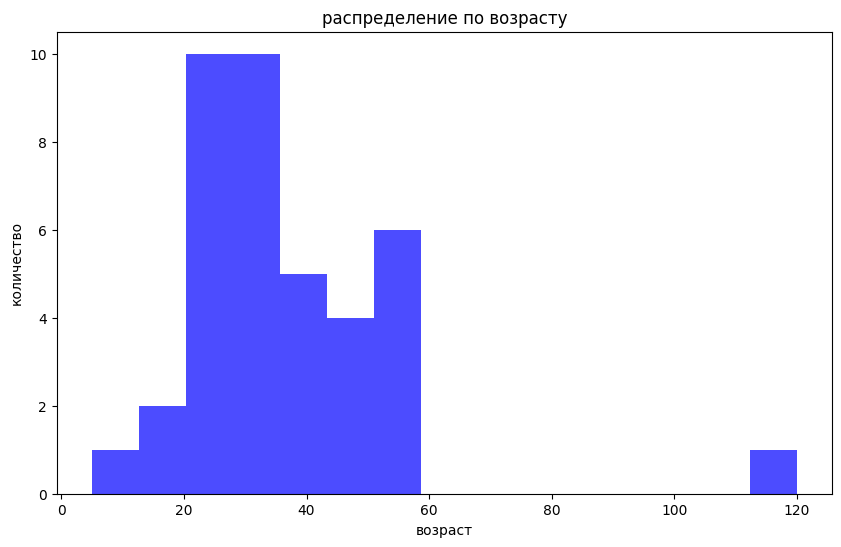

In [13]:
# гистограмма возраста
plt.figure(figsize=(10, 6))
plt.hist(df['age'].dropna(), bins=15, color='blue', alpha=0.7)
plt.xlabel('возраст')
plt.ylabel('количество')
plt.title('распределение по возрасту')
plt.savefig('figures/age_hist.png')
plt.show()

<Figure size 1000x600 with 0 Axes>

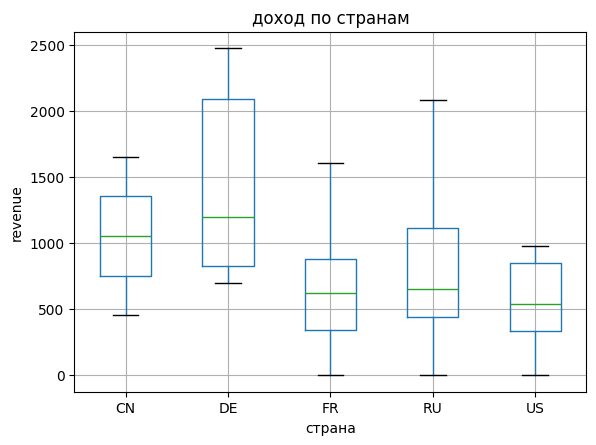

In [14]:
# боксплот
plt.figure(figsize=(10, 6))
df.boxplot(column='revenue', by='country')
plt.xlabel('страна')
plt.ylabel('revenue')
plt.title('доход по странам')
plt.suptitle('')
plt.savefig('figures/revenue_box.png')
plt.show()

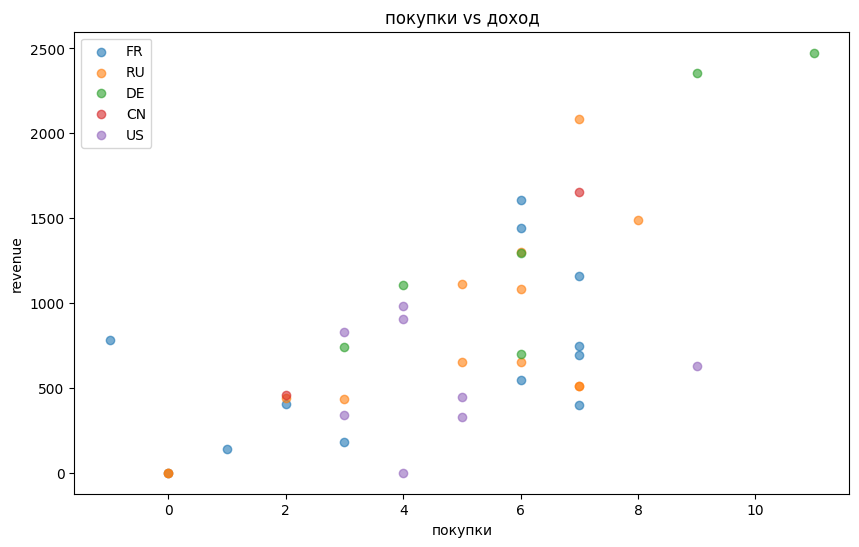

In [15]:
# скаттер
plt.figure(figsize=(10, 6))
for country in df['country'].unique():
    data = df[df['country'] == country]
    plt.scatter(data['purchases'], data['revenue'], label=country, alpha=0.6)
plt.xlabel('покупки')
plt.ylabel('revenue')
plt.title('покупки vs доход')
plt.legend()
plt.savefig('figures/scatter.png')
plt.show()

график показывает что чем больше покупок тем больше денег, логично